In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 10)


## Новых случаев

In [2]:
new_case = pd.read_csv('data_new.csv', sep=';', parse_dates=['Дата'], index_col='Дата')
new_case.columns = new_case.columns.str.strip()

In [3]:
#Последние 20 дней
new_case.last('20D')

,СПб,Лен. обл.,Москва,Моск. обл
Дата,,,,
2020-03-09,0,0,3,0
2020-03-10,0,0,0,0
2020-03-11,0,0,6,2
2020-03-12,0,0,4,0
2020-03-13,3,1,5,1
2020-03-14,1,0,9,1
2020-03-15,0,0,0,3
2020-03-16,3,0,20,1
2020-03-17,0,0,4,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f524b9de2e8>,
      dtype=object)

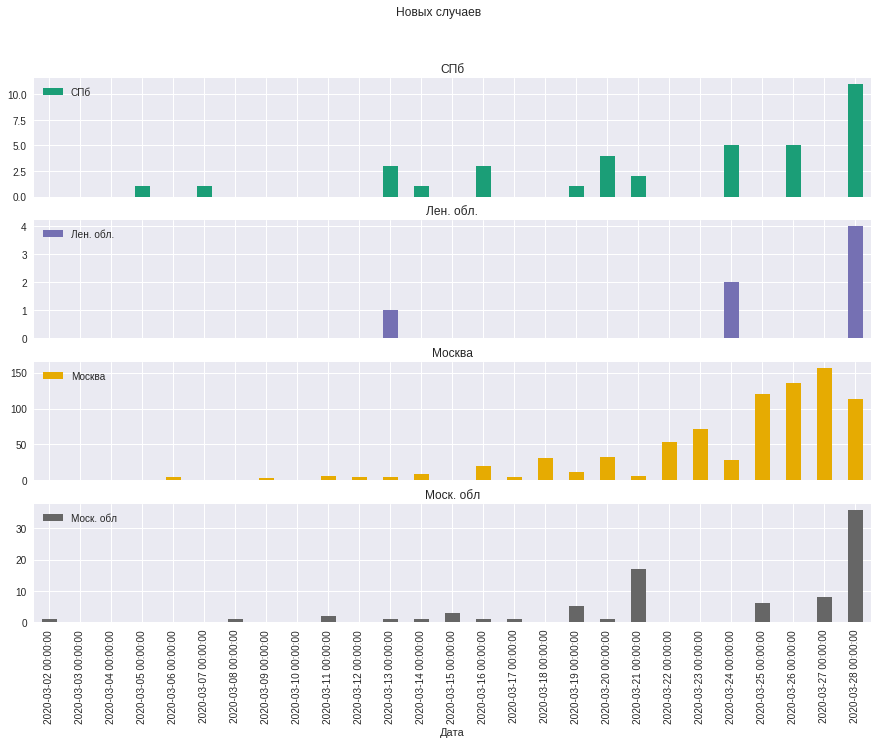

In [32]:
new_case.plot.bar(subplots = True, title = "Новых случаев", colormap='Dark2')

In [5]:
new_case.keys()

Index(['СПб', 'Лен. обл.', 'Москва', 'Моск. обл'], dtype='object')

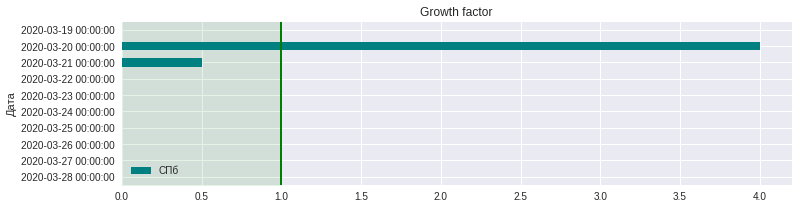

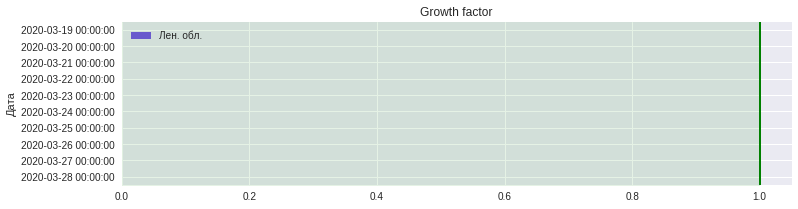

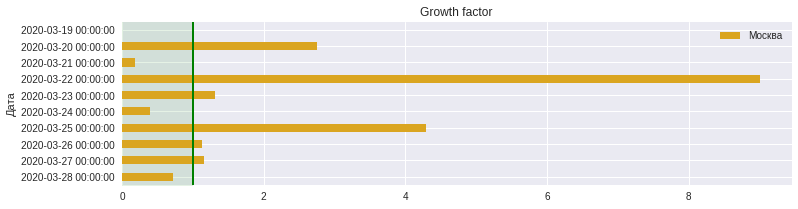

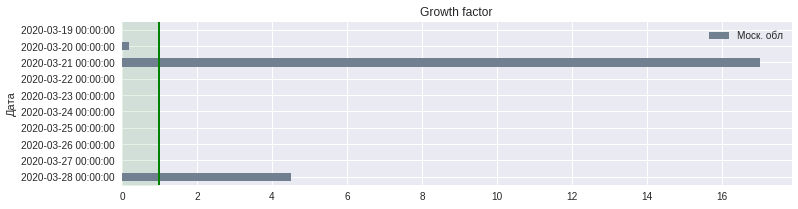

In [6]:
#Growth factor for last ten days

dates = new_case.index[-10 :]

gf_all = pd.DataFrame(index = dates)

for city in new_case.keys():   
    gf = []
    gf.append(None) # для первой даты

    #для каждой даты
    for row in range(new_case.index.size - 10 + 1, new_case.index.size, 1):
        if (0 == new_case[city].values[row - 1]):
            gf.append(None)
        else:
            gf.append(new_case[city].values[row] / new_case[city].values[row - 1])
    #print(new_case[city].values[row], new_case[city].values[row - 1], gf)
    gf_all[city] = gf
    
gf_all


colors = ['teal', 'slateblue', 'goldenrod', 'slategrey']
idx = 0
for city in new_case.keys(): 
    x = np.array([0, 1])
    gf_all[[city]].plot.barh(subplots = False, title = "Growth factor", figsize=(12,3), color = colors[idx]) 
    plt.axvline(x=1, lw=2, color='green')
    plt.fill_between(x, -1, dates.size + 1, color='green', alpha=0.1)
    plt.gca().invert_yaxis()
    idx += 1



## Всего случаев

In [7]:
total = new_case.copy()
#print(total.index.size)
for row in range(1, total.index.size, 1):
    total[:].values[row] = total[:].values[row] + total[:].values[row-1]

total.to_csv("data_total.csv",  sep=';')


In [8]:
#total = pd.read_csv('data_total.csv', sep=';', parse_dates=['Дата'], index_col='Дата')
#total.columns = total.columns.str.strip()

#Последние 10 дней
total.last('20D')

,СПб,Лен. обл.,Москва,Моск. обл
Дата,,,,
2020-03-09,2,0,9,2
2020-03-10,2,0,9,2
2020-03-11,2,0,15,4
2020-03-12,2,0,19,4
2020-03-13,5,1,24,5
2020-03-14,6,1,33,6
2020-03-15,6,1,33,9
2020-03-16,9,1,53,10
2020-03-17,9,1,57,11


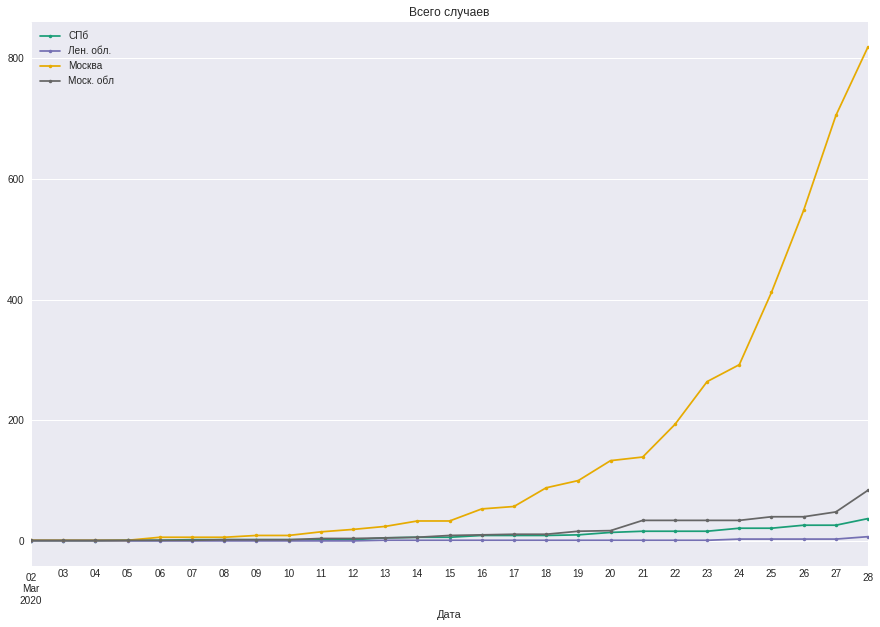

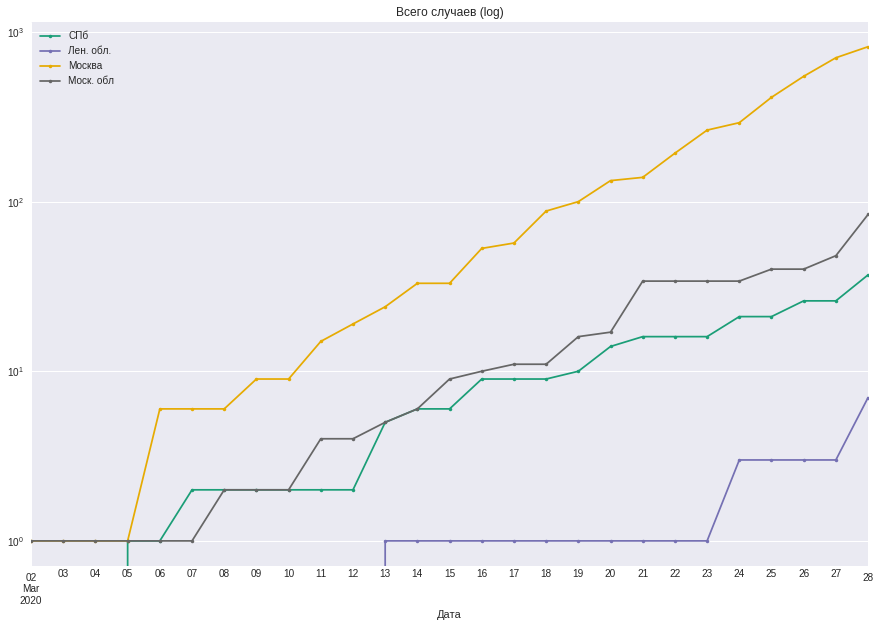

In [34]:
total.plot(style='.-', title = "Всего случаев", colormap='Dark2')
total.plot(style='.-', title = "Всего случаев (log)", colormap='Dark2', logy = True)

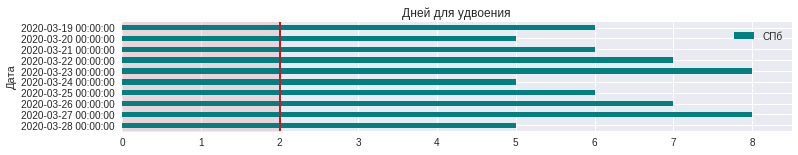

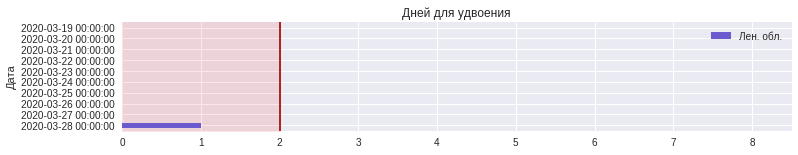

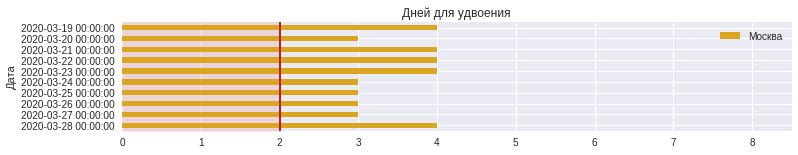

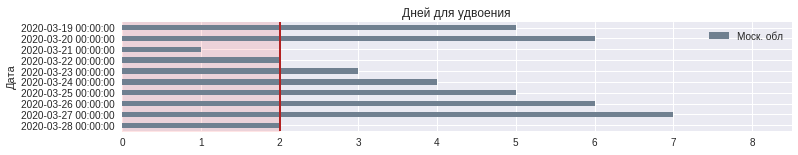

In [10]:
#Число дней, понадобившихся для удвоения (за последние 10 дней)

dates = total.index[-10 :]

rate_all = pd.DataFrame(index = dates)

for city in total.keys():   
    rate = [] #дней для удвоения
    
    #для каждой даты
    for cur_row in range(1, total.index.size, 1):
        half = int(total[city].values[cur_row] / 2)    
        if (half < 2): #при малом числе случаев, как-то бессмысленно оценивать скорость
            rate.append(-1)
            continue        
    
        #назад по списку, пока не найдём значение в два раза меньшее, чем на текущую дату
        for prev in range(cur_row - 1, -1, -1):        
            #print(prev, half, total['СПб'].values[row])               
            if half >= total[city].values[prev]:
                diff = total[city].index[cur_row] - total[city].index[prev]
                rate.append(diff.days)
                break
                
    rate_all[city] = rate[-10 : ]

rate_all

colors = ['teal', 'slateblue', 'goldenrod', 'slategrey']
idx = 0
for city in total.keys(): 
    x = np.array([0, 1, 2])
    rate_all[[city]].plot.barh(subplots = False, title = "Дней для удвоения", figsize=(12,2), color = colors[idx], xlim = (0, rate_all.max().max() + 0.5)) 
    plt.fill_between(x, -1, dates.size + 1,  color='red', alpha=0.1)
    plt.axvline(x=2, lw=2, color='firebrick')
    plt.gca().invert_yaxis()
    idx += 1    


In [11]:
# -1 -> маленькое число случаев, расчёт не производился
rate_all

,СПб,Лен. обл.,Москва,Моск. обл
Дата,,,,
2020-03-19,6,-1,4,5
2020-03-20,5,-1,3,6
2020-03-21,6,-1,4,1
2020-03-22,7,-1,4,2
2020-03-23,8,-1,4,3
2020-03-24,5,-1,3,4
2020-03-25,6,-1,3,5
2020-03-26,7,-1,3,6
2020-03-27,8,-1,3,7


## Страна

In [18]:
country = pd.read_csv('data_country.csv', sep=';', parse_dates=['Дата'], index_col='Дата')
country.columns = country.columns.str.strip()

In [19]:
#Всего на дату
offset = 23 #до даты появления летальных случаев
death_all = pd.DataFrame(index = country.index[offset:])
death_all['Умерших'] = 0
death_all['Умерших'].values[0] = country[['Умерших']].values[offset]

#print(total.index.size)
for row in range(1, death_all.index.size, 1):
    death_all['Умерших'].values[row] = country[['Умерших']].values[row+offset] + death_all[['Умерших']].values[row-1]

country['Всего умерших'] =  death_all

In [20]:
print(country.keys())

#Последние 10 дней
country.last('10D')

Index(['Зарегистрированных', 'Выписанных', 'Умерших', 'Под контролем',
       'Всего зарег.', 'Всего умерших'],
      dtype='object')


,Зарегистрированных,Выписанных,Умерших,Под контролем,Всего зарег.,Всего умерших
Дата,,,,,,
2020-03-19,52,5,0,22178.0,199,NaN
2020-03-20,54,12,0,27487.0,253,NaN
2020-03-21,53,16,0,36540.0,306,NaN
2020-03-22,61,16,0,52747.0,367,NaN
2020-03-23,71,17,0,72423.0,438,NaN
2020-03-24,57,22,0,93677.0,495,0.0
2020-03-25,163,29,2,112074.0,658,2.0
2020-03-26,182,38,0,138769.0,840,2.0
2020-03-27,196,45,1,145134.0,1036,3.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f524bc70438>,
      dtype=object)

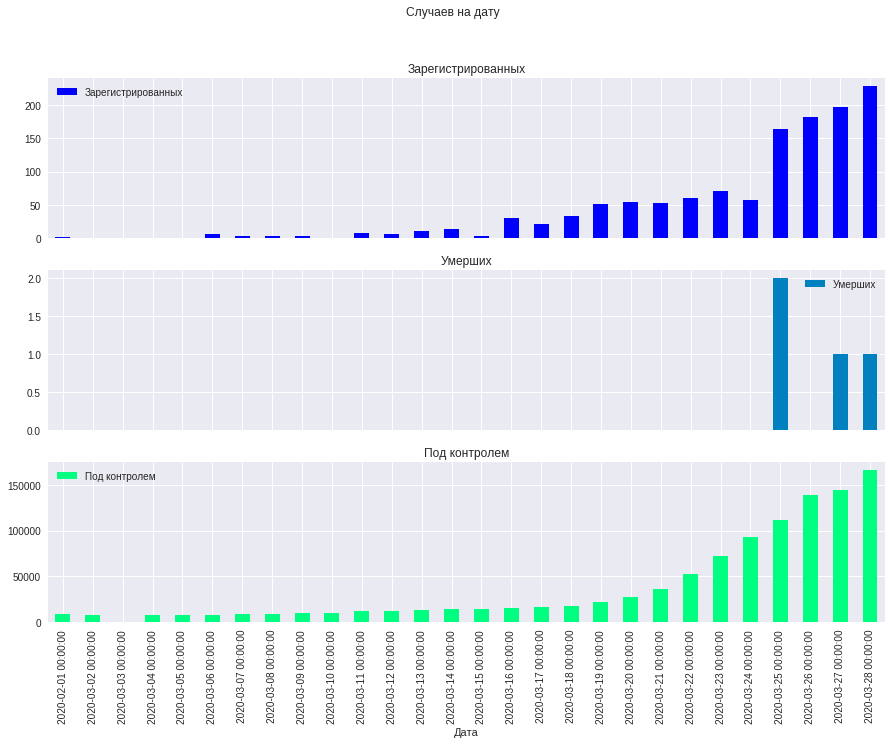

In [29]:
country[['Зарегистрированных',  'Умерших', 'Под контролем']].plot.bar(subplots = True, title = "Случаев на дату", colormap='winter', figsize=(15,10))

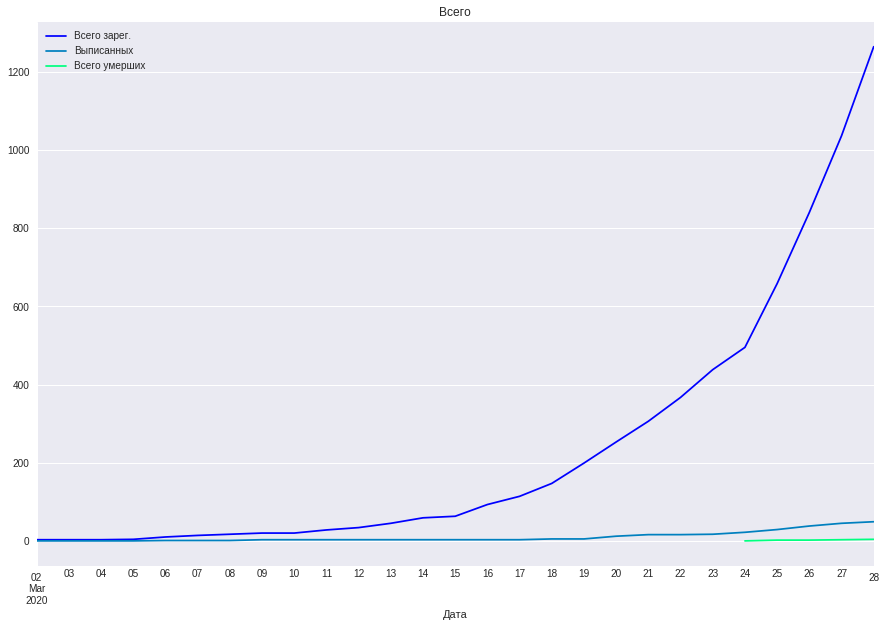

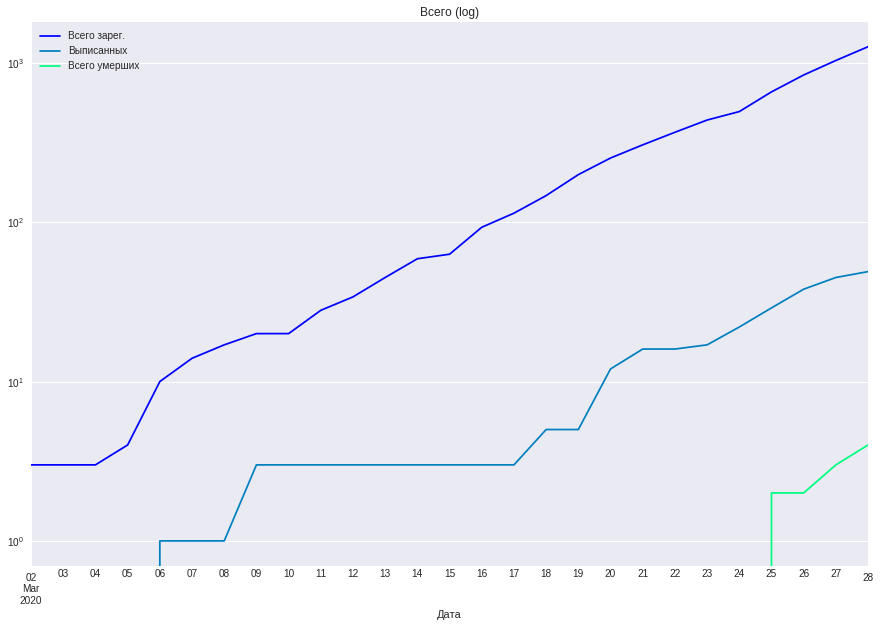

In [24]:
#начиная с 02.03.20
country[['Всего зарег.', 'Выписанных', 'Всего умерших']][1:].plot(subplots = False, title = "Всего", colormap='winter')
country[['Всего зарег.', 'Выписанных', 'Всего умерших']][1:].plot(subplots = False, title = "Всего (log)", colormap='winter', logy=True)

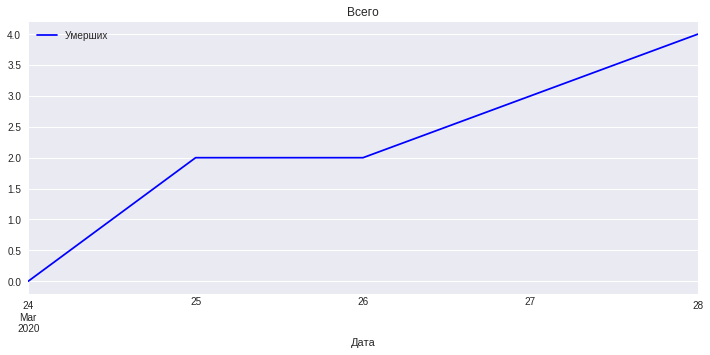

In [28]:
death_all.plot(subplots = False, title = "Всего", colormap='winter', figsize=(12,5))